# Regression using PyTorch

In this notebook, we will implement regresssion on a manually generated dataset.

First, we import libraries torch and matplotlib and the required functions from them.

In [ ]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

As we are using random numbers in generating the dataset, the random number generator is seeded with a number (which could be thought of as a parameter).

In [10]:
torch.manual_seed(2)    # reproducible. If we use a different seed, the dataset changes. Try with different values.

We want to find a curve which approximates the function $f(x)=x^2$. We are taking $x$ in the range $[-1,1]$ and pick $y$ as $f(x)$ with noise added. The resulting datapoints are plotted.

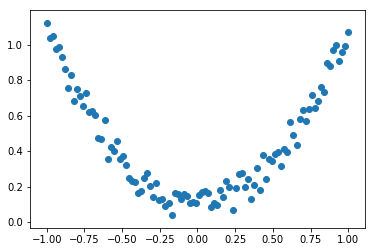

In [11]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

We now specify the architecture for the neural network and define what the forward pass does. We use a simple network with one hidden layer having 10 neurons.

In [12]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [13]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


For solving the optimization problem, we use stochastic gradient descent algorithm  with an appropriate learing rate. For information on other optimizers and the tunable parameters, see documentation at https://pytorch.org/docs/stable/optim.html. 

The loss function to be minimized can also be chosen. As we are working with regression, a mean squared loss is used. For other loss functions available, see https://pytorch.org/docs/stable/nn.html#loss-functions.

In [14]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # try with different learning rates.
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [15]:
plt.ion()   # interactive mode on for plotting

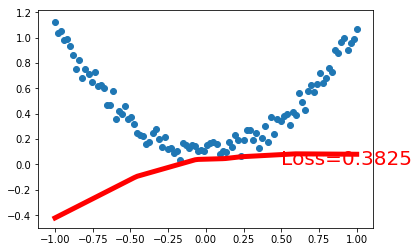

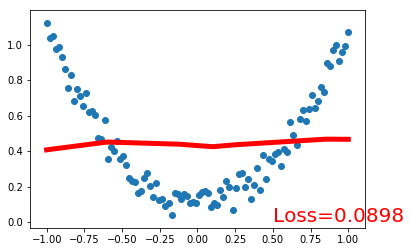

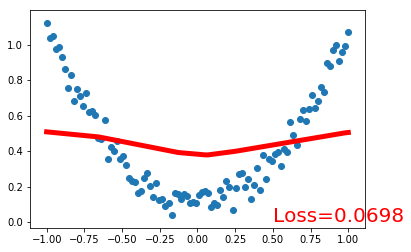

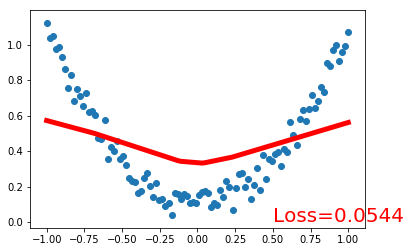

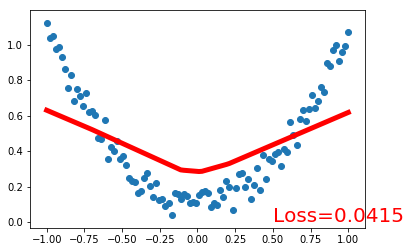

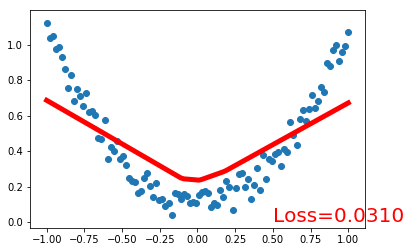

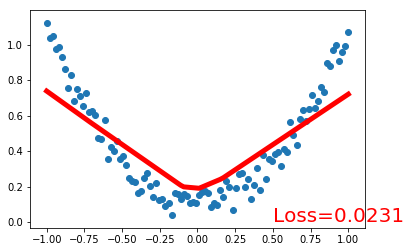

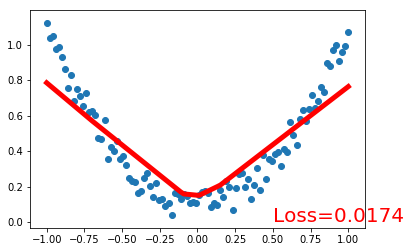

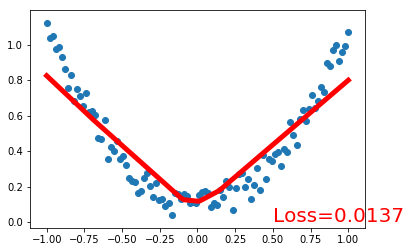

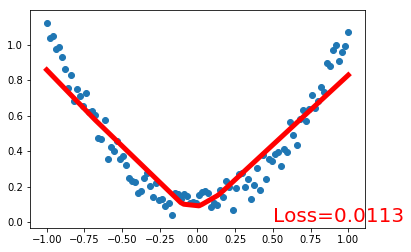

In [16]:
for t in range(100):
    prediction = net(x)     # prediction using the forward pass defined before

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process for every 10 timesteps
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()
